# Notebook to test stuff

In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
from plusultra.data.dataset import UnsplashDataset
import matplotlib.pyplot as plt
import plusultra.utils as utils
from torchvision.transforms import ToTensor
from plusultra.data.transforms import *

In [83]:
dataset = UnsplashDataset(transforms=[JpegCorrupt(corruption_amount=60),
                                      ResizeImage()])

In [84]:
len(dataset)

24808

In [85]:
x, y = dataset[4]
x, y = list(map(utils.tensor_to_numpy, [x,y]))

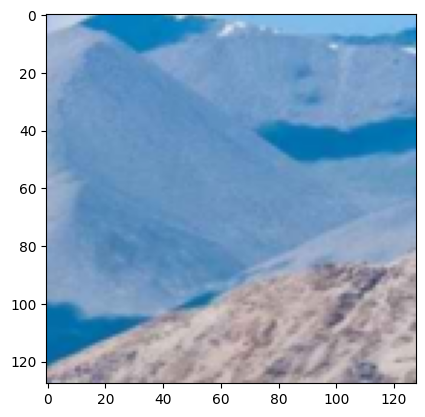

In [86]:
plt.imshow(x)

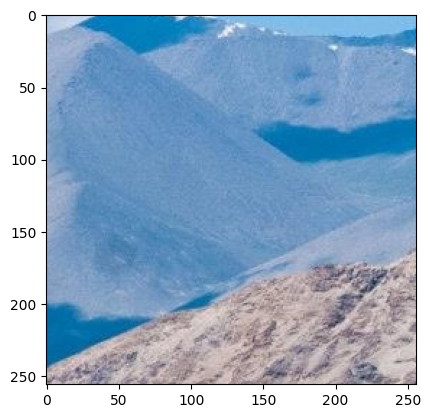

In [87]:
plt.imshow(y)

In [88]:
from plusultra.models.unet_base import Unet

In [89]:
model = Unet(downsample_conv=True, use_pixelshuffle=False)

In [90]:
inp, out = dataset[4]
inp.shape

torch.Size([3, 128, 128])

In [91]:
out_hat = model(inp.unsqueeze(0)).squeeze(0)

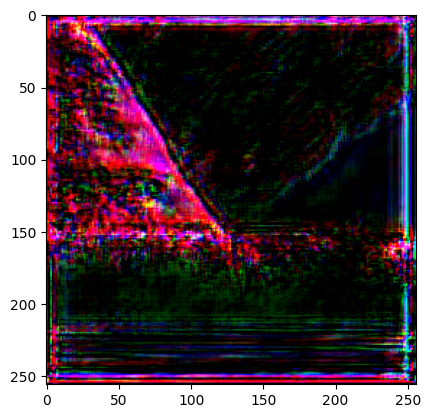

In [92]:
plt.imshow(utils.tensor_to_numpy(torch.clamp(out_hat.detach(), 0, 1)))

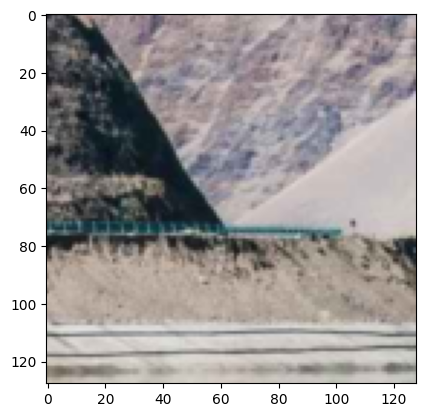

In [93]:
plt.imshow(utils.tensor_to_numpy(inp))